In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4

from sklearn import svm


## Task 1 (5+5+5+5+5=25 pts)

### Consider the dataset HW2_task1.csv, a binary classification problem with two real-valued input attributes.  As you can see from the plot, the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are allowed) and  answer the following five questions: 

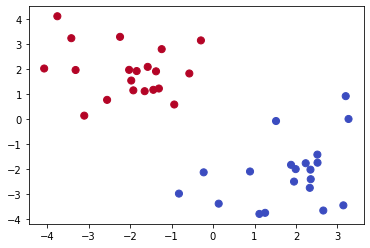

In [34]:
# Data
data1=pd.read_csv('HW2_task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

#### a. Report the separating hyperplane (line).

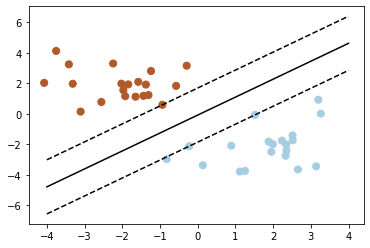

Seperating Hyperplane (Line):
 [-4.78422306 -4.59207724 -4.39993142 -4.2077856  -4.01563977 -3.82349395
 -3.63134813 -3.43920231 -3.24705649 -3.05491066 -2.86276484 -2.67061902
 -2.4784732  -2.28632737 -2.09418155 -1.90203573 -1.70988991 -1.51774409
 -1.32559826 -1.13345244 -0.94130662 -0.7491608  -0.55701497 -0.36486915
 -0.17272333  0.01942249  0.21156831  0.40371414  0.59585996  0.78800578
  0.9801516   1.17229743  1.36444325  1.55658907  1.74873489  1.94088072
  2.13302654  2.32517236  2.51731818  2.709464    2.90160983  3.09375565
  3.28590147  3.47804729  3.67019312  3.86233894  4.05448476  4.24663058
  4.4387764   4.63092223]


In [35]:
clf = svm.SVC(kernel='linear', C=100000)  
clf.fit(X, Y)

# Calculating Hyperlane
w = clf.coef_[0]
a = -w[0] / w[1]
x1 = np.linspace(-4, 4) # Extends line from -4 to 4
x2 = a * x1 - (clf.intercept_[0]) / w[1]

# Margins from hyperlane
bb = clf.support_vectors_[0]
x2_down = a * x1 + (bb[1] - a * bb[0])

ba = clf.support_vectors_[-1]
x2_up = a * x1 + (ba[1] - a * ba[0])

# Plot the Line
plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50, facecolors='none')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.Paired,s=50)

plt.axis('tight')
plt.show()

print("Seperating Hyperplane (Line):\n", x2)

#### b. List the support vectors.

In [4]:
# your code here
# clf.support_vectors_
print("Support vectors below the hyperlane:",clf.support_vectors_[0],clf.support_vectors_[1])
print("\nSupport vectors above the hyperlane:",clf.support_vectors_[2])

Support vectors below the hyperlane: [-0.22627536 -2.11810965] [ 1.5180363  -0.06399383]

Support vectors above the hyperlane: [-0.93564585  0.5969359 ]


#### c. Calculate the upper and lower hyperplanes (lines) of the margin.

Lower lane: y = 1.177x + -1.852

Upper lane: y = 1.177x + 1.698


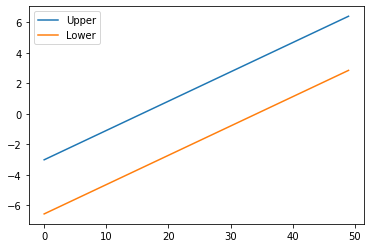

In [5]:
# your code here
bl = (bb[1] - a * bb[0])
formula = 'y = ' + str(round(a,3)) + 'x' ' + ' + str(round(bl,3))
print("Lower lane: " + formula)

bu = (ba[1] - a * ba[0])
formula = 'y = ' + str(round(a,3)) + 'x' ' + ' + str(round(bu,3))
print("\nUpper lane: " + formula)

plt.plot(x2_up, label = 'Upper')
plt.plot(x2_down, label = 'Lower')
plt.legend()
plt.show()

#### d. Compute the width of the margin.

In [43]:
# your code here
w_norm = np.sqrt(pow(a, 2))     # ||w||
two_m = bu + abs(bl)            # m + m = 2m
print("Margin width:", two_m/w_norm)

Margin width: 3.0163305728937018


#### e. What would you expect to happen to the margin if the constant C was made very small?

With very small <em>constant C</em>, the accuracy of calculating the hyperplane and margin would be low. There would be an increase in error values with "unequal" hyperplane between the seperation. <br> See graph below...

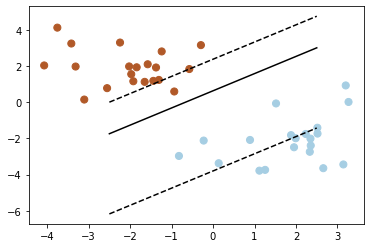

In [7]:
clf = svm.SVC(kernel='linear', C=0.000000001)  
clf.fit(X, Y)

# Calculating Hyperlane
w = clf.coef_[0]
a = -w[0] / w[1]
x1 = np.linspace(-2.5, 2.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

# Margins from hyperlane
bd = clf.support_vectors_[0]
x2_down = a * x1 + (bd[1] - a * bd[0])

ba = clf.support_vectors_[-1]
x2_up = a * x1 + (ba[1] - a * ba[0])

# Plot the Line
plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50, facecolors='none')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.Paired,s=50)

plt.axis('tight')
plt.show()

## Task 2 (4+8+8=20 pts)

### Given the dataset provided below, answer the following questions:

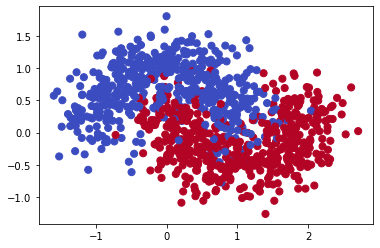

In [8]:
# Data 
data2=pd.read_csv('HW2_task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### a. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy.

In [9]:
# Defualt degree = 2 
clf = svm.SVC(kernel='poly',degree=2) 
clf.fit(X_train, Y_train)

SVC(degree=2, kernel='poly')

In [10]:
pred = (clf.predict(X_train) == Y_train).sum()*100/len(Y_train)
print("In sample: Predict {} percent of the data".format(pred))

In sample: Predict 72.53731343283582 percent of the data


In [11]:
pred = (clf.predict(X_test) == Y_test).sum()*100/len(Y_test)
print("Out sample: Predict {} percent of the data".format(pred))

Out sample: Predict 74.24242424242425 percent of the data


### Next we will use the validation subset in order to pick the optimal parameters for the polynomial model.

### b. Try polynomials of degree 1,2,3,4. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below.  Plot the graph of "Accuracy vs log(C)" for each degree.


/var/folders/t8/141gkcpd5vs43q8f2_fl9bwc0000gn/T/ipykernel_1476/1930636166.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_frame = result_frame.append(result_data, ignore_index=True)


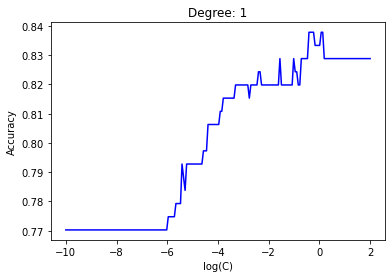

/var/folders/t8/141gkcpd5vs43q8f2_fl9bwc0000gn/T/ipykernel_1476/1930636166.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_frame = result_frame.append(result_data, ignore_index=True)


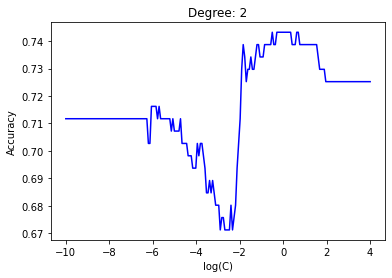

/var/folders/t8/141gkcpd5vs43q8f2_fl9bwc0000gn/T/ipykernel_1476/1930636166.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_frame = result_frame.append(result_data, ignore_index=True)


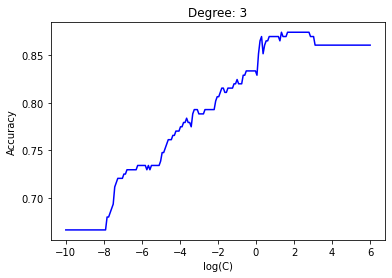

/var/folders/t8/141gkcpd5vs43q8f2_fl9bwc0000gn/T/ipykernel_1476/1930636166.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_frame = result_frame.append(result_data, ignore_index=True)


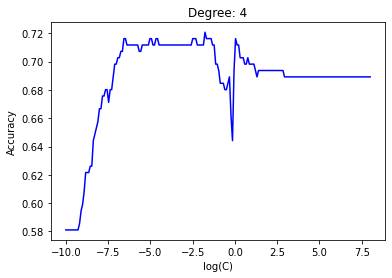

,Degree,Highest C,Accuracy
0,1.0,-0.41206,0.837838
1,2.0,-0.502513,0.743243
2,3.0,1.336683,0.873874
3,4.0,-1.768844,0.720721


In [12]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

# your code here
import math
degree = [1, 2, 3, 4]
result_frame = pd.DataFrame(columns = ['Degree', 'Highest C', 'Accuracy'])
for d in degree:
    OS_validation=[]
    C = [math.exp(i) for i in np.linspace(-10,2*d,200)]
    for c in C:    
        clf = svm.SVC(kernel='poly',degree=d, C=c) 
        clf.fit(X_train_1, Y_train_1)
        correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
        OS_validation.append(correct)
    
    log_C = [np.log(y) for y in C] # for a better graph
    temp=pd.DataFrame([log_C,OS_validation]).T # put results together.
#     print(temp)
    opt_row = temp[1].idxmax()
    result_data = {
        'Degree':d, 
        'Highest C':temp.iloc[opt_row][0], 
        'Accuracy':temp.iloc[opt_row][1]
    }
    result_frame = result_frame.append(result_data, ignore_index=True)
    plt.gca()
    plt.plot(log_C,OS_validation,'b',)
    plt.title("Degree: "+str(d))
    plt.ylabel('Accuracy')
    plt.xlabel('log(C)')
    plt.show()
result_frame

### c. Choose the optimal degree and the optimal regularization constant C based on these graphs.  Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected. 

In [26]:
# your code here
clf = svm.SVC(kernel='poly',degree=3, C=math.pow(10, 1.336683)) 
clf.fit(X_train_1, Y_train_1)
correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()*100/len(Y_vali)
print("Optimal Out of Sample",correct)

Optimal Out of Sample 87.38738738738739


## Task 3 (5+5=10pts).

### This task is to be done by hand rather than using Python.

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,no

SUV,red,domestic,yes

SUV,red,imported,yes

SUV,yellow,imported,no

SUV,yellow,imported,yes

SUV,yellow,domestic,no

sports,yellow,imported,no

sports,red,imported,yes


### Questions:

a) Calculate the following sample probabilities:

#### Answer
P(Yes): <b> 7/11 </b>

P(No): <b> 4/11 </b>

P(Red|Yes): <b> 6/7 </b>

P(SUV|Yes): <b> 3/5 </b>

P(Domestic|Yes): <b> 4/6 </b>

P(Red|No): <b> 1/7 </b>

P(SUV|No): <b> 2/5 </b> 

P(Domestic|No): <b> 2/6 </b>

b) Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen? Show your work.

#### Answer


$\displaystyle \frac{P(Red|Yes)P(Domestic|Yes)P(SUV|Yes)P(Yes)}{P(Red|Yes)P(Domestic|Yes)P(SUV|Yes)P(Yes) + P(Red|No)P(Domestic|No)P(SUV|No)P(No)}$
<br><br>

$\displaystyle \frac{\frac{6}{7} * \frac{4}{6} * \frac{3}{5} * \frac{7}{11}} {(\frac{6}{7} * \frac{4}{6} * \frac{3}{5} * \frac{7}{11}) + (\frac{1}{7} * \frac{2}{6} * \frac{2}{5} * \frac{4}{11})} = \displaystyle \frac{63}{65}$

## Task 4 (4+2+2+2=10pts)

Consider the following problem involving Gaussian Naive Bayes classification.  We use eight factors to predict if people have diabetes or not. The variables are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)

### Using the data provided below, learn a Naive Bayes classifier from the training data and answer the following questions: 

In [27]:
# Training data
data_train=pd.read_csv("HW2_task4_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

# Testing data
data_test=pd.read_csv("HW2_task4_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

print(X_train.head())

   t_pre    glu  blood_p  triceps  serum   b_m  pedigree_f   age
0    3.0  158.0     64.0     13.0  387.0  31.2       0.295  24.0
1    0.0   84.0     64.0     22.0   66.0  35.8       0.545  21.0
2    9.0  120.0     72.0     22.0   56.0  20.8       0.733  48.0
3    4.0  110.0     76.0     20.0  100.0  28.4       0.118  27.0
4    2.0  100.0     66.0     20.0   90.0  32.9       0.867  28.0


### a) What is the prediction accuracy for Naive Bayes, both in sample (on the training data) and out of sample (on the test data)?

In [28]:
# your code here
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
trained_model = gnb.fit(X_train,y_train)
y_pred_train = trained_model.predict_proba(X_train)[:,1]
y_pred_test = trained_model.predict_proba(X_test)[:,1]

# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train))
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test))

In sample prediction accuracy: 0.7584745762711864
Out of sample prediction accuracy: 0.7911392405063291


### b) What is the prior probability of diabetes, learned from the training data?

In [29]:
# your code here
only_diab = data_train[data_train['y'] == 1] # y == 1 = diabetes
prob_diab = len(only_diab) / len(data_train)
prob_diab
# only_diab.head()
# data_train.head(5)

0.3008474576271186

### c) What is the mean and variance of each input variable for patients with diabetes?

In [32]:
# your code here
    
only_diab.mean() # Mean
only_diab.var()  # Variance

Unnamed: 0    49172.657143
y                 0.000000
t_pre            12.380684
glu             937.979879
blood_p         190.420926
triceps          95.310262
serum         16108.940443
b_m              39.168704
pedigree_f        0.192758
age             105.340443
dtype: float64

### d) What is the mean and variance of each input variable for patients without diabetes?

In [18]:
# your code here

## Task 5 (10+15=25 pts)

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [19]:
data_train=pd.read_csv("HW2_task5_train.csv")
y_Labeled_train=data_train.iloc[:,1] 
X_Labeled_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("HW2_task5_test.csv")
y_Labeled_test=data_test.iloc[:,1]
X_Labeled_test=data_test.iloc[:,2:]

data_Unlabeled=pd.read_csv("HW2_task5_unlabeled.csv")
X_Unlabeled_train=data_Unlabeled.iloc[:,1:]

print(X_Labeled_train)
print(y_Labeled_train)

   0  1  2
0  4  6  6
1  2  2  2
2  2  6  2
3  6  6  6
4  1  2  2
5  3  4  4
6  6  1  6
7  1  3  1
8  5  1  6
0    0
1    1
2    0
3    0
4    1
5    0
6    0
7    1
8    1
Name: y, dtype: int64


### a) Learn a discrete Naive Bayes classifier from  X_Labeled_train, use it to predict the labels of X_Labeled_test, and report the classification accuracy.

In [20]:
# your code here

### b) Improve the classification by using the unlabeled data, data_Unlabeled and the EM algorithm to predict labels of X_Labeled_test, and report the new accuracy by EM semi-supervised algorithm (Please feel free to use code from our lab sessions or any packages you prefer). 

In [21]:
# your code here